# A simple guide to alphavantage in Python
## Introduction

There are two libraries listed on PyPI that I know of: alphavantage and alpha_vantage. As of writing (11/2018) they don't support the full alphavantage API functionality. This guide uses a simple function to request data from alphavantage and plots it. It supports the full alphavantage API stack (that can be exported via CSV) uncluding historical FX and cryptocurrencies. In the end I also show an example of requesting JSON data. If you need more examples, just go the great documentation over at: https://www.alphavantage.co/documentation/ 

imports first:

In [1]:
import io
import requests
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.dpi']= 80

Save your api key in a file called "av_key.txt" in the same directory (or don't):

In [2]:
with open('av_key.txt') as f:
    api_key = f.read()

This function will do the "heavy" lifting:

In [3]:
def get_alphavantage(function, args_dict, api_key=api_key):
    url = 'https://www.alphavantage.co/query?function=' + function
    for key, value in args_dict.items():
        url = url + '&' + key + '=' + value
    url = url + '&apikey=' + api_key + '&datatype=csv'
    request = requests.get(url)
    df = pd.read_csv(io.StringIO(request.text))
    column_names = list(df)
    if column_names[0] == 'timestamp':
        return df.set_index('timestamp').sort_index()
    if column_names[0] == 'time':
        return df.set_index('time').sort_index()
    return df

## Equity prices
Let's get some intraday stock prices and plot them.

In [4]:
function = 'TIME_SERIES_INTRADAY' 
args = {'symbol': 'MSFT', 'interval': '5min'}
msft_intraday = get_alphavantage(function, args)

             open       high         low       close        volume
count  100.000000  100.00000  100.000000  100.000000  1.000000e+02
mean   107.758877  107.89436  107.610822  107.737208  3.641374e+05
std      1.069827    1.06563    1.076551    1.065476  1.825023e+05
min    106.270000  106.57000  106.100000  106.240000  0.000000e+00
25%    106.960000  107.06375  106.867500  106.947500  2.609980e+05
50%    107.255000  107.36750  107.110000  107.255000  3.317310e+05
75%    108.638750  108.72000  108.435000  108.535000  4.044885e+05
max    109.950000  109.98000  109.720000  109.870000  1.519375e+06


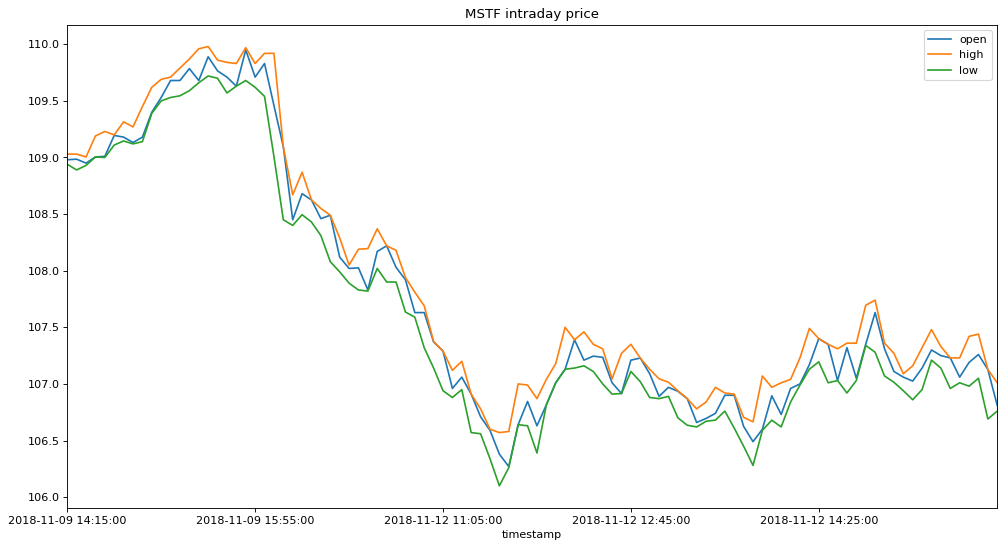

In [5]:
print(msft_intraday.describe())
msft_intraday[['open', 'high', 'low']].plot(title='MSTF intraday price')

## Forex (FX)
Let's get historical EUR/USD FX rates on a daily basis and plot them:

In [6]:
function = 'FX_DAILY'
args = {'from_symbol': 'EUR', 'to_symbol': 'USD'}
eur_usd = get_alphavantage(function, args)

             open        high         low       close
count  100.000000  100.000000  100.000000  100.000000
mean     1.155262    1.158525    1.151558    1.154857
std      0.012475    0.012705    0.012674    0.012807
min      1.124900    1.127100    1.121400    1.121900
25%      1.145150    1.149350    1.139300    1.143775
50%      1.157400    1.160800    1.153550    1.156950
75%      1.164200    1.169100    1.161625    1.163650
max      1.177900    1.181500    1.173700    1.177900


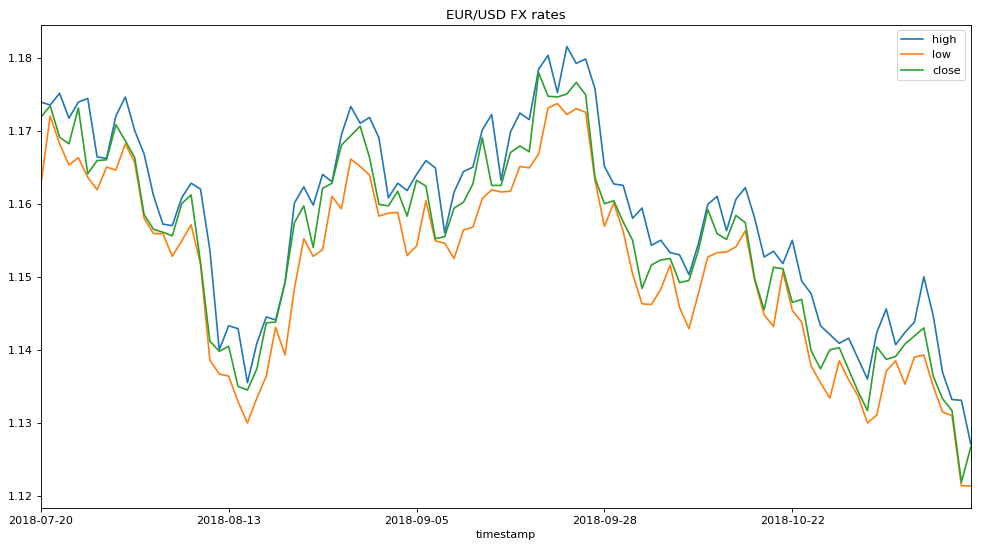

In [7]:
print(eur_usd.describe())
eur_usd[['high', 'low', 'close']].plot(title='EUR/USD FX rates')

## Crypto currencies
Let's get historical BTC/EUR rates on a weekly basis:

In [8]:
function = 'DIGITAL_CURRENCY_WEEKLY' 
args = {'symbol': 'BTC', 'market': 'EUR'}
btc_eur = get_alphavantage(function, args)

         open (EUR)    high (EUR)     low (EUR)   close (EUR)    open (USD)  \
count    241.000000    241.000000    241.000000    241.000000    241.000000   
mean    2240.478025   2466.111519   2025.822098   2262.382645   2642.053643   
std     3043.682865   3412.016192   2652.558366   3048.313920   3641.617103   
min      184.706647    207.274145    151.626353    183.979546    213.576412   
25%      311.644872    351.726495    295.342665    311.996573    376.900055   
50%      540.874605    558.204403    530.288731    544.026386    626.332693   
75%     3642.358330   3895.757384   3442.412774   3696.010075   4354.804316   
max    15958.294383  16560.746649  12620.605589  15964.210615  18747.489650   

         high (USD)     low (USD)   close (USD)         volume  \
count    241.000000    241.000000    241.000000     241.000000   
mean    2909.293087   2384.844587   2666.285882  109074.208561   
std     4081.787673   3167.275403   3645.695279   73433.282548   
min      232.653525    1

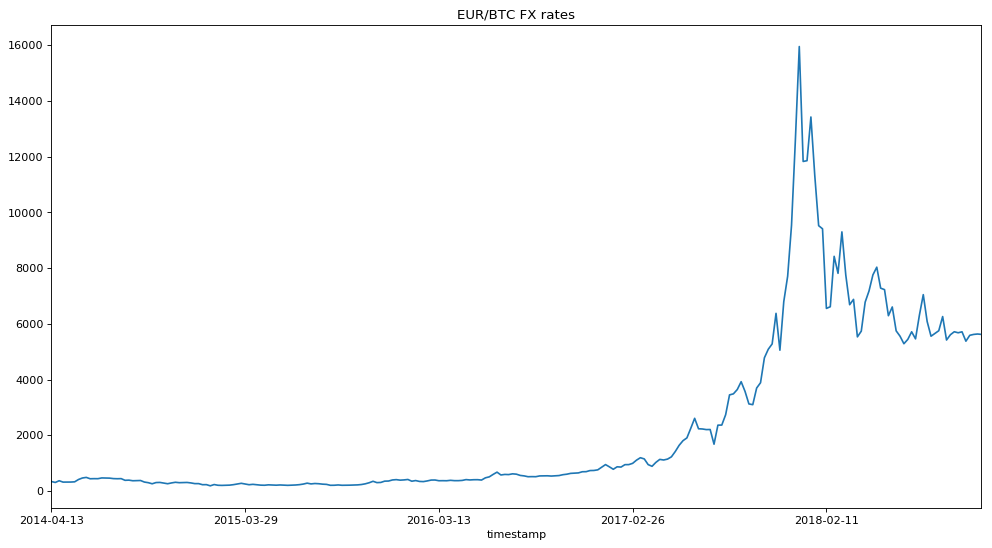

In [9]:
print(btc_eur.describe())
btc_eur['open (EUR)'].plot(title='EUR/BTC FX rates')

On a log scale:

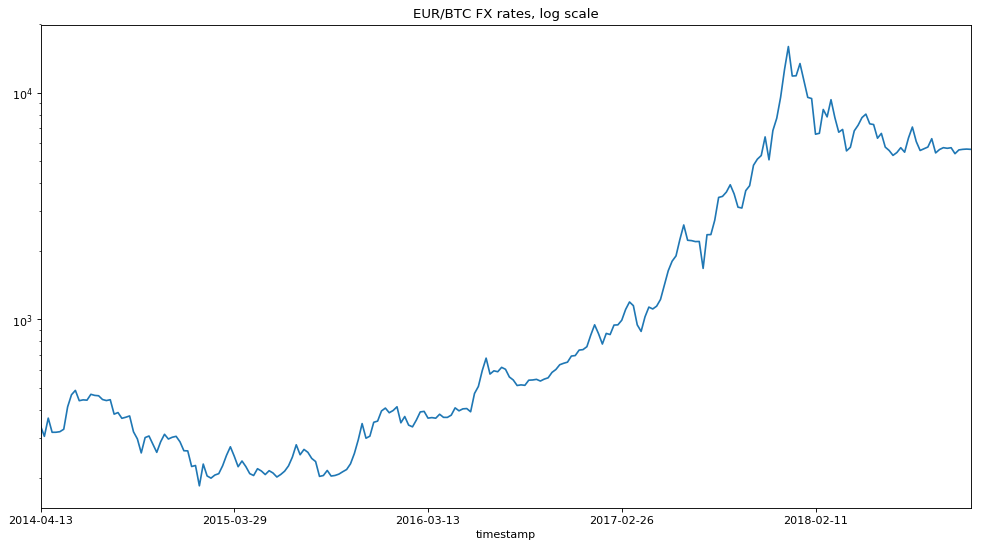

In [10]:
btc_eur['open (EUR)'].plot(logy=True, title='EUR/BTC FX rates, log scale')

## Technical Indicators
Let's get the Bollinger bands for MSFT

In [11]:
function = 'BBANDS' 
args = {'symbol': 'MSFT', 'interval': '15min', 'time_period': '60', 'series_type': 'close'}
msft_bb = get_alphavantage(function, args)

                  Real Lower Band  Real Middle Band  Real Upper Band
time                                                                
2018-10-04 11:30         113.7585          115.2356         116.7127
2018-10-04 11:45         113.6328          115.2076         116.7824
2018-10-04 12:00         113.4942          115.1708         116.8475
2018-10-04 12:15         113.3352          115.1308         116.9265
2018-10-04 12:30         113.1728          115.0838         116.9949


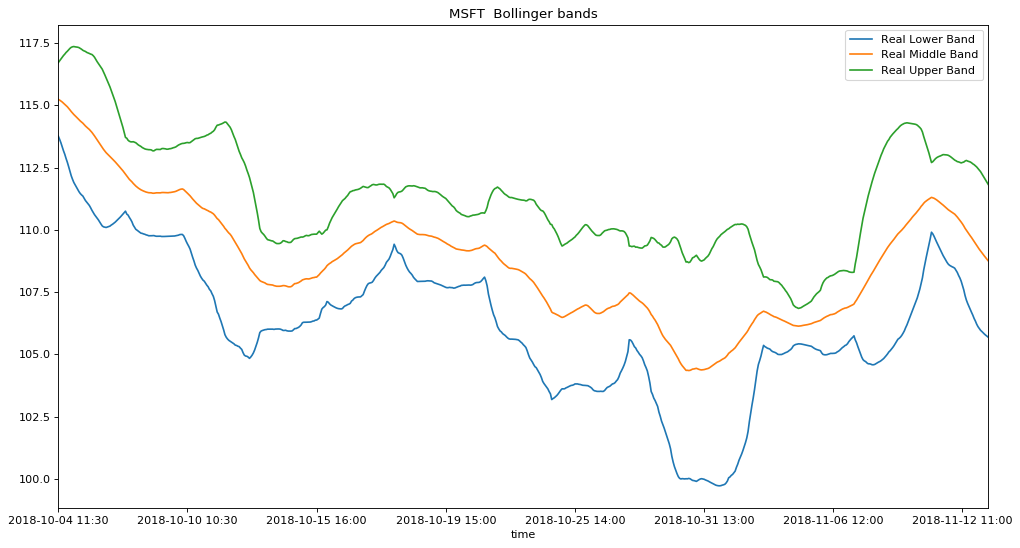

In [12]:
print(msft_bb.head())
msft_bb.plot(title='MSFT  Bollinger bands')

## Sector performances
Last but not least some hacking away with json data..

In [13]:
function = 'SECTOR' 
url = 'https://www.alphavantage.co/query?function=' + function
url = url + '&apikey=' + api_key
request = requests.get(url)
json = request.json()

In [14]:
ranks = list(json)
ranks

['Meta Data',
 'Rank A: Real-Time Performance',
 'Rank B: 1 Day Performance',
 'Rank C: 5 Day Performance',
 'Rank D: 1 Month Performance',
 'Rank E: 3 Month Performance',
 'Rank F: Year-to-Date (YTD) Performance',
 'Rank G: 1 Year Performance',
 'Rank H: 3 Year Performance',
 'Rank I: 5 Year Performance',
 'Rank J: 10 Year Performance']

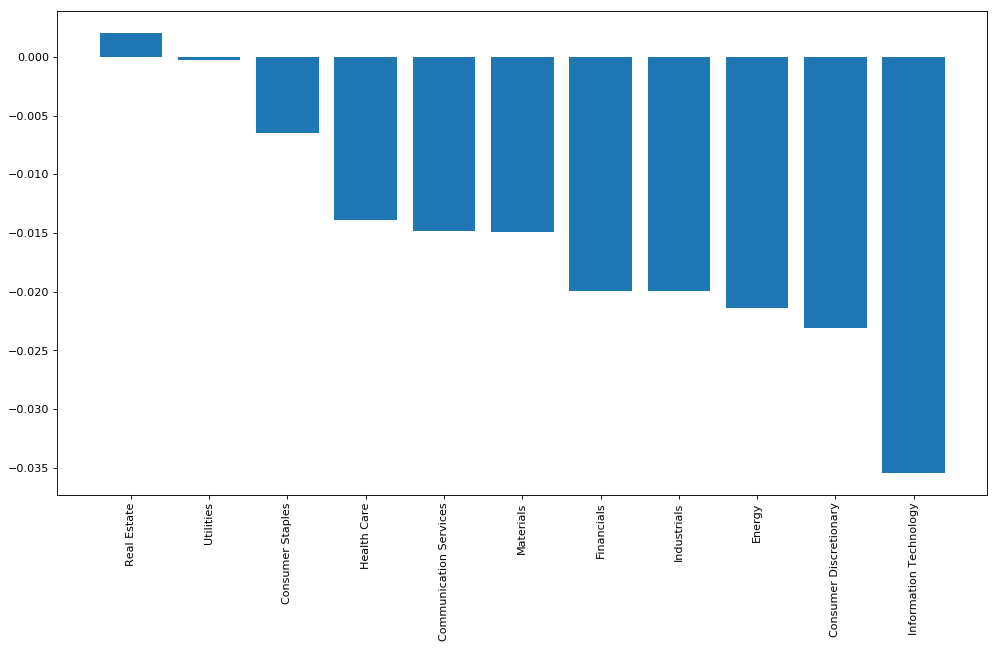

In [15]:
real_time = json['Rank A: Real-Time Performance']
values = [float(x.strip('%'))/100 for x in real_time.values()]
keys = list(real_time.keys())

plt.bar(range(len(real_time)), values, align='center')
plt.xticks(range(len(real_time)), keys)
plt.xticks(rotation=90)
plt.show()

## Multiple equity prices
Let's get the adjusted prices for AAPL and MSFT historically on a weekly basis and save them into a dataframe:

In [16]:
def get_weekly_adjusted_close(ticker_list):
    prices_df = pd.DataFrame()
    function = 'TIME_SERIES_WEEKLY_ADJUSTED' 
    for ticker in ticker_list:
        args = {'symbol': ticker}
        df = get_alphavantage(function, args)
        series = df['adjusted close'].rename(ticker)
        prices_df = pd.concat([prices_df, series], axis=1)
    return prices_df

In [18]:
aapl_msft_hist = get_weekly_adjusted_close(['AAPL', 'MSFT'])

              AAPL         MSFT
count  1089.000000  1089.000000
mean     43.324874    30.480458
std      53.075198    20.095243
min       0.573700    10.433200
25%       1.756500    18.881700
50%      17.069400    22.545200
75%      72.346100    32.653500
max     226.835800   114.370000


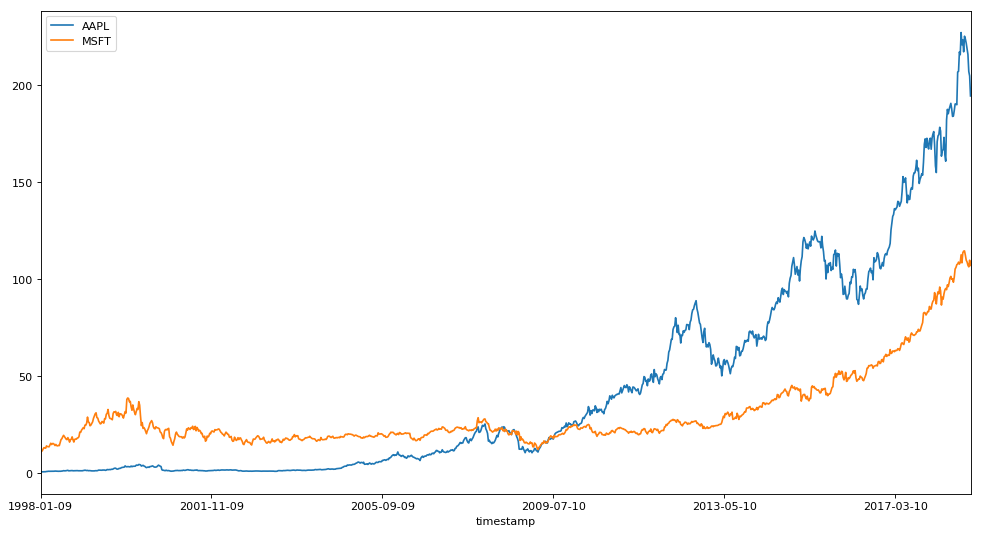

In [19]:
print(aapl_msft_hist.describe())
aapl_msft_hist.plot()